In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf



In [3]:
'''(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')'''

"(X_train, y_train), (X_test, y_test) = mnist.load_data()\n\nprint(f'Training data shape: {X_train.shape}')\nprint(f'Test data shape: {X_test.shape}')"

In [4]:
# Load data from CSV files
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')


In [5]:
X_train = train.drop('label', axis=1).values
y_train = train['label'].values

if 'label' in test.columns:
    X_test = test.drop('label', axis=1).values
    y_test = test['label'].values
else:
    X_test = test.values
    y_test = None


In [6]:
X_train_images = X_train.reshape(-1, 28, 28)

In [7]:
# Flatten and normalize
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (42000, 784)
Flattened test data shape: (28000, 784)


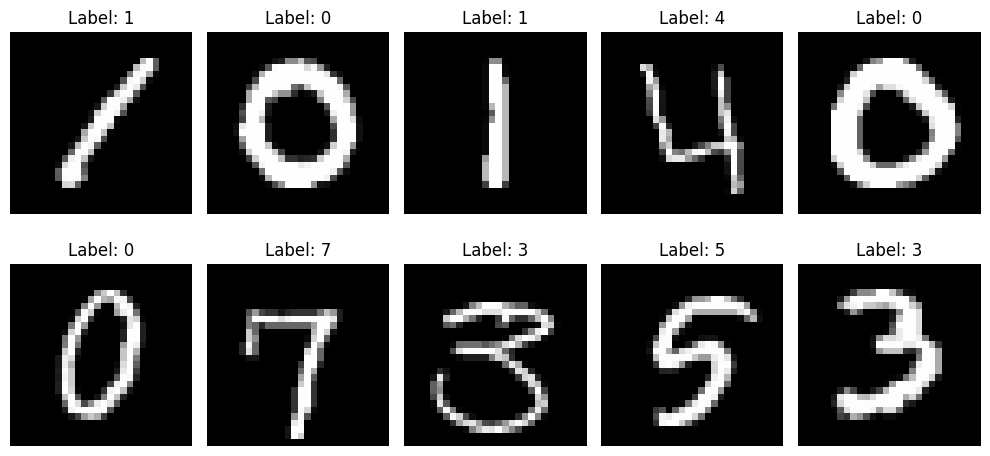

In [7]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_images[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (33600, 784)
Validation set shape: (8400, 784)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 73s 129ms/step - accuracy: 0.8181 - loss: 0.5947 - val_accuracy: 0.8931 - val_loss: 0.3852
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 81s 128ms/step - accuracy: 0.9664 - loss: 0.1089 - val_accuracy: 0.9823 - val_loss: 0.0585
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 51s 96ms/step - accuracy: 0.9740 - loss: 0.0820 - val_accuracy: 0.9867 - val_loss: 0.0429
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.9779 - loss: 0.0666 - val_accuracy: 0.9858 - val_loss: 0.0412
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 85s 99ms/step - accuracy: 0.9782 - loss: 0.0714 - val_accuracy: 0.9846 - val_loss: 0.0482
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 78s 92ms/step - accuracy: 0.9832 - loss: 0.0547 - val_accuracy: 0.9896 - val_loss: 0.0325
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.9849 - loss: 0.0497 - val_accuracy: 0.9890 - val_loss: 0.0333
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.9862 - loss: 0.0428 

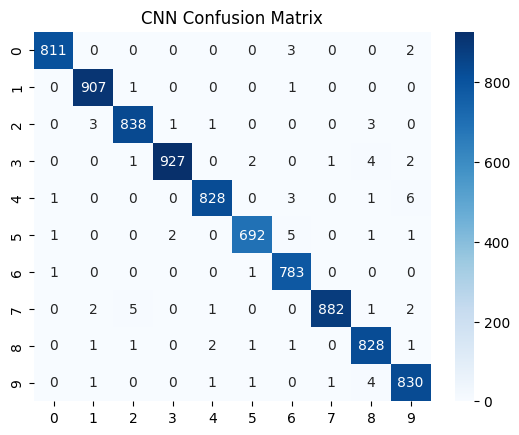

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

# Load data from CSV files
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Split data into features and labels
X_train = train.drop('label', axis=1).values / 255.0  # Normalize pixel values
y_train = train['label'].values

if 'label' in test.columns:
    X_test = test.drop('label', axis=1).values / 255.0  # Normalize test data
    y_test = test['label'].values
else:
    X_test = test.values / 255.0
    y_test = None

# Reshape for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels for training
y_train = to_categorical(y_train, 10)

# Split training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Build the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val, y_val),
    epochs=10,  # You can increase epochs for better performance
    batch_size=64,
    verbose=1
)

# Evaluate the model
val_loss, val_accuracy = cnn_model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Accuracy: {val_accuracy:.4f}')



# Predict on the validation set
y_val_pred = cnn_model.predict(X_val).argmax(axis=1)
y_val_true = y_val.argmax(axis=1)

# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_val_true, y_val_pred))

sns.heatmap(confusion_matrix(y_val_true, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.show()


In [12]:
print(f"y_train shape: {y_train.shape}")


y_train shape: (42000,)


Original feature dimensions: 784
Reduced feature dimensions: 50
SVM Validation Accuracy (with PCA): 0.9777
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.99      0.99      0.99       909
           2       0.98      0.98      0.98       846
           3       0.98      0.97      0.97       937
           4       0.97      0.97      0.97       839
           5       0.98      0.97      0.97       702
           6       0.98      0.99      0.99       785
           7       0.98      0.97      0.98       893
           8       0.97      0.98      0.98       835
           9       0.96      0.97      0.97       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



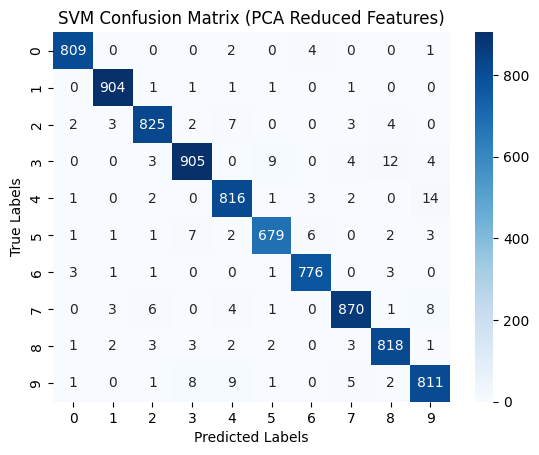

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train, y_train, X_val, and y_val are loaded
# Flatten and normalize the data for PCA
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensions
pca = PCA(n_components=50)  # Reduce to 50 principal components
X_train_pca = pca.fit_transform(X_train_split)
X_val_pca = pca.transform(X_val_split)

print(f"Original feature dimensions: {X_train_flat.shape[1]}")
print(f"Reduced feature dimensions: {X_train_pca.shape[1]}")

# Train an SVM on the PCA-reduced data
svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # RBF kernel
svm_model.fit(X_train_pca, y_train_split)

# Predict on the validation set
y_val_pred_svm = svm_model.predict(X_val_pca)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_val_split, y_val_pred_svm)
print(f"SVM Validation Accuracy (with PCA): {svm_accuracy:.4f}")

# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_val_split, y_val_pred_svm))

# Confusion matrix visualization
cm = confusion_matrix(y_val_split, y_val_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix (PCA Reduced Features)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
